# NewWhitening Method:
In this notebook, I perfom the same analysis as Sigma_intrinsic_Analysis notebooks, except the whitening method is changed. Given a season, the magnitude of each band is shifted to the mean value of the total data in that season.
We expect to get a better fitting. 

##  All data analysis

First, we'll import `SLTimer`, as well as a few other important commands. 

In [13]:
from __future__ import print_function
import os, urllib, numpy as np
%matplotlib inline
import desc.sltimer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Munging

Start a timer object, download some data to use, and plot the data. 

True Time delay 

Note: -1 comes from different time delay difinition between TDC2 and PyCS.

In [14]:
truthurl = "http://www.slac.stanford.edu/~pjm/LSST/DESC/SLTimeDelayChallenge/release/tdc2/gateway/gatewaytruth.txt"
truthfile = truthurl.split('/')[-1]
if not os.path.isfile(truthfile):
    urllib.urlretrieve(truthurl, truthfile)
d = np.loadtxt(truthfile).transpose()
truth = d[0][1]
print("True Time Delays:", -1*truth)

True Time Delays: -39.1


Downloaded datafile: http://www.slac.stanford.edu/~pjm/LSST/DESC/SLTimeDelayChallenge/release/tdc2/gateway/tdc2-gateway-2.txt
Checking header of "tdc2-gateway-2.txt"...
Reading "tdc2-gateway-2.txt"...
[Image/A] with 1014 points imported (0 of them masked).
Checking header of "tdc2-gateway-2.txt"...
Reading "tdc2-gateway-2.txt"...
[Image/B] with 1014 points imported (0 of them masked).
whiten: before whitening, means = {'A': 21.332139503633996, 'B': 21.05974099147501}
whiten: before whitening, scatters = {'A': 0.84208267217182786, 'B': 0.74641686620521042}
whiten: detected bands: ['g' 'i' 'r' 'u' 'y' 'z']
whiten: after whitening, means = {'A': 21.332139503634, 'B': 21.059740991474992}
whiten: after whitening, scatters = {'A': 0.70065735143675334, 'B': 0.73537263894876104}


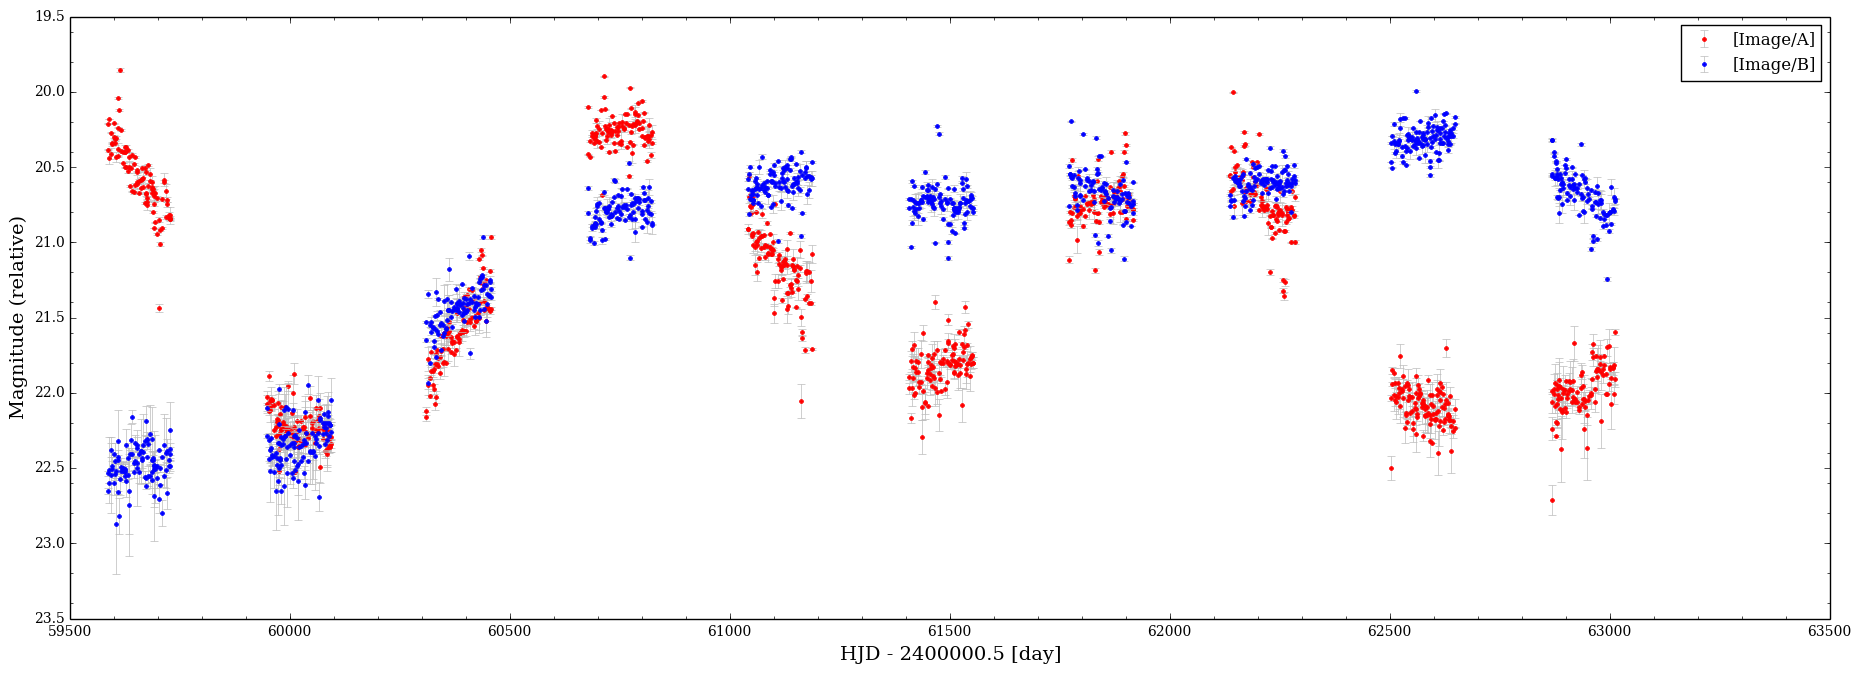

In [15]:
timer = desc.sltimer.SLTimer()
url = "http://www.slac.stanford.edu/~pjm/LSST/DESC/SLTimeDelayChallenge/release/tdc2/gateway/tdc2-gateway-2.txt"
timer.download(url, and_read=True, format='tdc2')
timer.whiten(seasonal=True)
timer.display_light_curves()
name_data="Gateway_2_ml350_all_50_delay_chi2_1000_samples.txt"
SampleUrl="http://stanford.edu/~chto/TestWhitening/"

In [16]:
timer.ml_knotstep=350
timer.knotstep=50

In [17]:
import os, urllib
def getFile(knotstep):
    name=name_data.format(knotstep)
    url=SampleUrl+name
    urllib.urlretrieve(url, name)
def plot_file(timer, knotstep, batch_sigma=False):
    name=name_data.format(knotstep)
    print(name)
    timer.plot_likelihood_from_file(name, outName="", chisquare=True, bins=200,corner_plot=False, add_prior=True, batch_sigma=batch_sigma)
def batch_analyze(timer, knotstep, batch_sigma=False, download=True):
    timer.knotstep=knotstep
    timer.ml_knotstep=350
    if download:
        getFile(knotstep)
    plot_file(timer, knotstep, batch_sigma=batch_sigma)
    print("degree of freedom is : {0}".format(timer.degree_of_freedom()))
def plot_light_curve(timer, delay, knotstep,jdrange=(59500,63100)):
    timer.knotstep=knotstep
    lcs, agn = timer.compute_chisq(delay=[delay], getlcs=True)
    timer.display_light_curves(given_curve=(lcs,agn),jdrange=jdrange)
def combile_sigma_File(fileArray, outName):
    with open(outName, 'w') as outfile:
        for index,fname in enumerate(fileArray):
            with open(fname) as infile:
                for line in infile:
                    if index!=0:
                        if line[0]=='#':
                            continue
                    outfile.write(line)

get likelihood files

In [18]:
name_data_original="Gateway_2_Rescaled_{0}_ml350_all_50_delay_chi2_1000_samples.txt"
for sigma in [0,0.2,0.02,0.002,0.0002]:
    name_data=name_data_original.format(sigma)
    getFile(knotstep=50)

In [19]:
combile_sigma_File(fileArray=["Gateway_2_Rescaled_0_ml350_all_50_delay_chi2_1000_samples.txt",
                              "Gateway_2_Rescaled_0.2_ml350_all_50_delay_chi2_1000_samples.txt",
                              "Gateway_2_Rescaled_0.02_ml350_all_50_delay_chi2_1000_samples.txt",
                              "Gateway_2_Rescaled_0.002_ml350_all_50_delay_chi2_1000_samples.txt",
                              "Gateway_2_Rescaled_0.0002_ml350_all_50_delay_chi2_1000_samples.txt"], 
                   outName='combined.txt')

combined log likelihood

combined.txt
Starting ML optimization ...
Done !
Starting ML optimization ...
Done !
knotstep for intrinsic fluctuation is: 50
knotstep for micro lensing is: 350
number of data points is: 2028
degree of freedom is : {'dof': 1772, '# data': 2028}


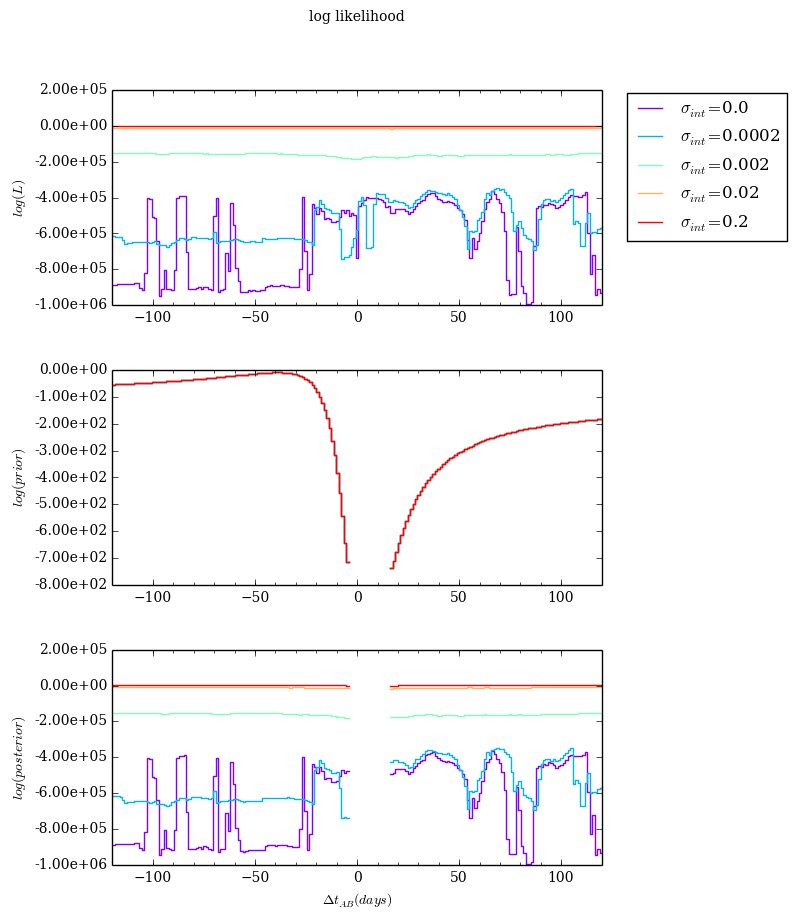

In [20]:
name_data="combined.txt"
batch_analyze(timer, knotstep=50, batch_sigma=True, download=False)

Sigma_init = 0.2 is too large for this figure, so I plot it individually.

Gateway_2_Rescaled_0.2_ml350_all_50_delay_chi2_1000_samples.txt


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


Starting ML optimization ...
Done !
Starting ML optimization ...
Done !
knotstep for intrinsic fluctuation is: 50
knotstep for micro lensing is: 350
number of data points is: 2028
degree of freedom is : {'dof': 1770, '# data': 2028}


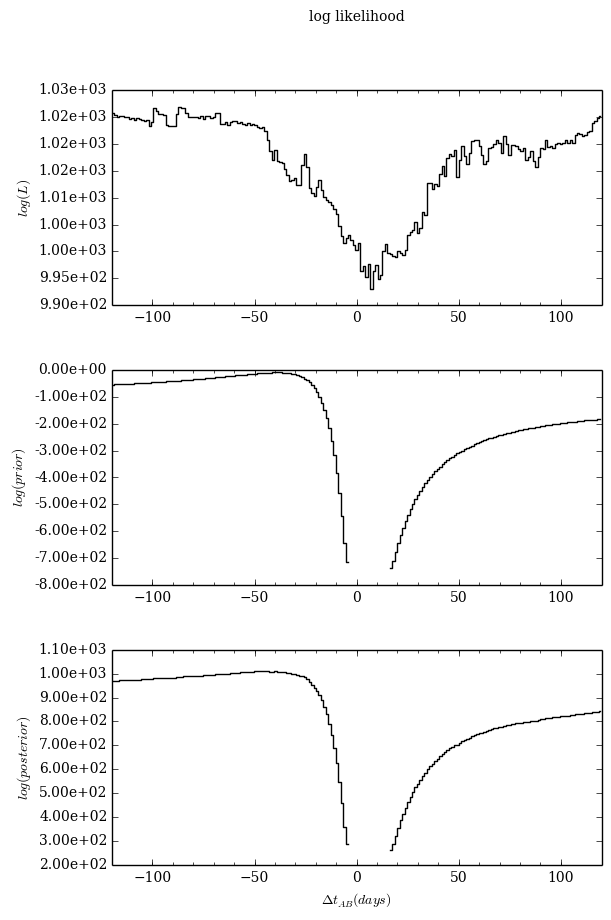

In [9]:
name_data="Gateway_2_Rescaled_0.2_ml350_all_50_delay_chi2_1000_samples.txt"
batch_analyze(timer, knotstep=50)

Another way to see this is to plot likelihood to sigma diagram given true time delay

In [10]:
def get_loglikelihood(timer, sigma):
    timer.reset_lc()
    timer.sigma_intrinsic = sigma
    timer.rescale_noise()
    chisquare=timer.chisquare_to_loglikelihood(timer.compute_chisq([-39.1], batch=False, getlcs=False))
    timer.reset_noise() 
    return chisquare

In [11]:
sigma_Array=np.logspace(-2,0,50)
chisquare=[]
for sigma in sigma_Array:
    chisquare.append(get_loglikelihood(timer, sigma))

add additional noise 0.01
Starting ML optimization ...
Working on the spline ML of [Image/A]|~3/u/8~|
Working on the spline ML of [Image/B](-39.100,0.699,0)|~3/u/8~|
Done !
Starting ML optimization ...
Working on the spline ML of [Image/A]|~3/u/8~|
Working on the spline ML of [Image/B](-39.100,0.699,0)|~3/u/8~|
Done !
-7375.85659093
delete additional noise 0.01
add additional noise 0.0109854114199
Starting ML optimization ...
Working on the spline ML of [Image/A]|~3/u/8~|
Working on the spline ML of [Image/B](-39.100,0.699,0)|~3/u/8~|
Done !
Starting ML optimization ...
Working on the spline ML of [Image/A]|~3/u/8~|
Working on the spline ML of [Image/B](-39.100,0.699,0)|~3/u/8~|
Done !
-7309.05990105
delete additional noise 0.0109854114199
add additional noise 0.0120679264064
Starting ML optimization ...
Working on the spline ML of [Image/A]|~3/u/8~|
Working on the spline ML of [Image/B](-39.100,0.699,0)|~3/u/8~|
Done !
Starting ML optimization ...
Working on the spline ML of [Image/A]

0.01


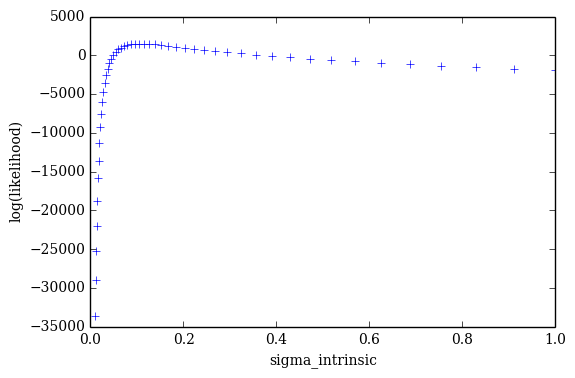

In [12]:
from matplotlib import pyplot as plt
print(min(sigma_Array))
chisquare=np.array(chisquare)
plt.plot(sigma_Array, chisquare,"+")
plt.ylabel("log(likelihood)")
plt.xlabel("sigma_intrinsic")

Conclusion:
1. The likelihood looks weird. There is no peak at the true time delay. I am still thinking what makes this version of whitening fali. 
2. The peak of sigma_intric shifts to a lower value. It is expected, because the new whitening can reduce some scattering of data that is not appropriately described by the error bar. 